In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize

path = '/content/gdrive/MyDrive/Serao_Barigliano/data'

In [ ]:
def load_training():
  images = np.load(os.path.join(path,'train_tensor.npy'))
  labels = np.load(os.path.join(path,'train_labels.npy'))
  
  ab_img = [images[2*i + 1] for i in range(0,len(images)//2)]
  bsl_img = [images[2*i] for i in range(0,len(images)//2)]

  ab_lbl = [labels[2*i + 1] for i in range(0, len(labels)//2)]
  bsl_lbl = [labels[2*i] for i in range(0, len(labels)//2)]

  return ab_img,ab_lbl,bsl_img,bsl_lbl

In [ ]:
def load_test():
  images = np.load(os.path.join(path,'public_test_tensor.npy'))
  labels = np.load(os.path.join(path,'public_test_labels.npy'))
  
  ab_img = [images[2*i + 1] for i in range(0,len(images)//2)]
  bsl_img = [images[2*i] for i in range(0,len(images)//2)]

  ab_lbl = [labels[2*i + 1] for i in range(0, len(labels)//2)]
  bsl_lbl = [labels[2*i] for i in range(0, len(labels)//2)]

  return ab_img,ab_lbl,bsl_img,bsl_lbl

In [ ]:
def divide_classes(labels, classes):
  if classes == "mass_calcification":
    res = [0 if i <= 2 else 1 for i in labels]
  elif classes == "benign_malignant":
    res = [0 if (i % 2) == 1 else 1 for i in labels]
  else:
    print("Error: Wrong classes. Choose 'mass_calcification' or 'benign_malignant'.")
  return res

In [ ]:
def normalize_dataset(dataset):
  res = [normalize(tensor) for tensor in dataset]
  return res

In [ ]:
def shuffle_dataset(data, labels):
    data, labels = shuffle(data, labels)
    return data, labels

In [ ]:
def count_classes(dataset):
  _,counts = np.unique(dataset, return_counts=True)
  return counts.tolist() 

In [ ]:
def properties(tensor):
  print('Properties: ')
  print(f'Shape: {tensor.shape}') 
  print(f'Min: {tensor.min()}')
  print(f'Max: {tensor.max()}')
  print(f'Diff: {tensor.max()-tensor.min()}')
  print(f'Type of elements: {tensor.dtype}')

In [ ]:
def plot_training(acc, loss, val_acc, val_loss, epochs, path):
  fig, (acc_g,loss_g) = plt.subplots(1,2, figsize=(12,5))
  x_axis = range(epochs)

  # accuracy curves
  acc_g.plot(x_axis, acc, color='tab:orange', linestyle='-', label='training', linewidth=1)
  acc_g.plot(x_axis, val_acc, color='tab:blue', linestyle='-', label='validation', linewidth=1)

  # loss curves
  loss_g.plot(x_axis, loss, color='tab:orange', linestyle='-', label='training', linewidth=1)
  loss_g.plot(x_axis, val_loss, color='tab:blue', linestyle='-',label='validation', linewidth=1)

  # accuracy graph style options
  acc_g.grid(axis='y', linestyle='-', linewidth=0.5)
  acc_g.set_xlabel('Epochs')
  acc_g.set_ylabel('Accuracy')
  acc_g.set_title('Accuracy', fontdict={'fontsize':14}, pad=20)
  acc_g.legend(loc='lower right')

  # loss graph style options
  loss_g.grid(axis='y', linestyle='-', linewidth=0.5)
  loss_g.set_xlabel('Epochs')
  loss_g.set_ylabel('Loss')
  loss_g.set_title('Loss', fontdict={'fontsize':14}, pad=20)
  loss_g.legend(loc='upper right')

  # layout adjustment
  plt.tight_layout()

  # save graph
  fig.savefig(path)

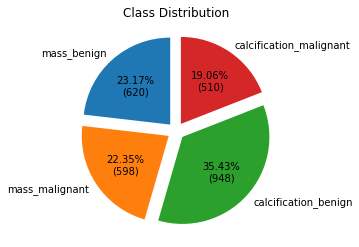

Properties: 
Shape: (150, 150)
Min: 21203
Max: 50265
Diff: 29062
Type of elements: uint16


In [ ]:
if __name__ == '__main__':
  ab_img,ab_lbl,bsl_img,bsl_lbl = load_training()
  legend = 'mass_benign', 'mass_malignant', 'calcification_benign', 'calcification_malignant'
  sections = count_classes(ab_lbl)
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
  plt.pie(sections, labels=legend, colors=colors,
        startangle=90,
        explode = (0.1, 0.1, 0.1, 0.1),
        autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*len(ab_lbl)),
        #textprops = {"color":"w"}
        )

  plt.title('Class Distribution')
  plt.show()
  properties(ab_img[0])